In [1]:
import sys
sys.path.insert(0, '../')
from utils.clock_draw_custom import apply_model

import cv2

/Users/collin/miniconda3/envs/yolo7/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

YOLOR 🚀 b64be0f torch 1.13.1 CPU



Fusing layers... 


/Users/collin/miniconda3/envs/yolo7/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36530318 parameters, 6194944 gradients, 103.3 GFLOPS


RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse


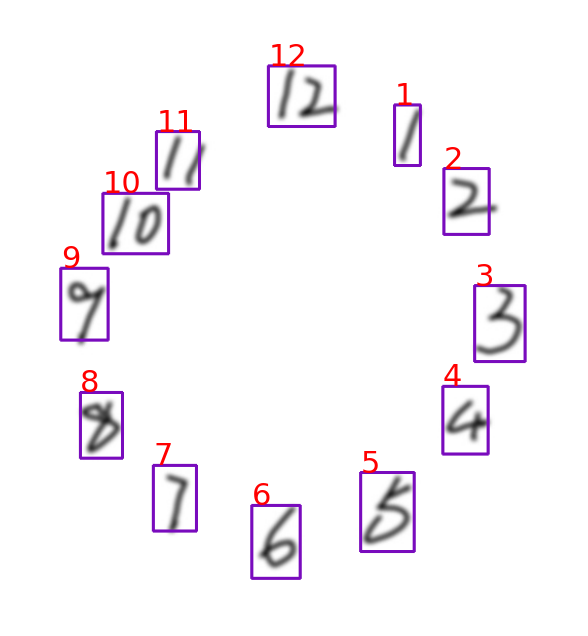

In [3]:
#img_path = '../../DATA/appTest/test_14.jpg'
img_path =  '../../DATA/appTest/test_25.jpg'
model_path = '../runs/train/yolov7-custom/weights/best.pt'
image= cv2.imread(img_path)
rects, predNum = apply_model(image, model_path)
#image= cv2.imread(img_path)
#for rect in rects:
#    rect[0] -= x_center
#    rect[1] -= y_center
#image= cv2.imread(img_path)
plt.figure(figsize=(8,8))

for rect, digitPre in zip(rects, predNum):
        x = rect[0] + rect[2] / 2
        y = rect[1] + rect[3] / 2
        img = cv2.rectangle(image, (int(rect[0]), int(rect[1])), (int(rect[0]) + int(rect[2]),
                            int(rect[1]) + int(rect[3])), color= (121, 11, 189),  thickness=2)
        point = (int(rect[0]), int(rect[1]))
        
        plt.annotate(str(int(digitPre)), xy=point, fontsize = 22, color = 'red')
plt.imshow(img, cmap="gray")
plt.axis('off')
plt.show()